-----
事前にここでTeXのディラック記法を書けるようにしておく
-----

$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$
-----

In [10]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

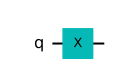

In [11]:
# 1-1

# |0> 量子ビットに対してゲート作用させてみましょう。
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

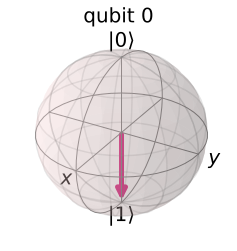

In [12]:
# 結果を見てみましょう
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [13]:
# 1-2
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

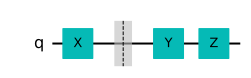

In [14]:
qc.y(0) # 量子ビット0にYゲートを適用します。
qc.z(0) # 量子ビット0にZゲートを適用します。
qc.draw()

In [15]:
# 2 practice 1

$$
\begin{aligned}
      X\ket{+} = 
      \left[\begin{array}{c}
            0 & 1 \\
            1 & 0 \\
        \end{array}\right] 
      \left[\begin{array}{c}
            \frac{1}{\sqrt{2}} \\
            \frac{1}{\sqrt{2}} \\
        \end{array}\right]  \\
      = \left[\begin{array}{c}
            \frac{1}{\sqrt{2}} \\
            \frac{1}{\sqrt{2}} \\
        \end{array}\right]  
      = \frac{1}{\sqrt{2}}\left[\begin{array}{c}
            1 \\
            1 \\
        \end{array}\right]  \\
      = \ket{+}
      \end{aligned}
$$

$$
\begin{aligned}
      X\ket{-} = 
      \left[\begin{array}{c}
            0 & 1 \\
            1 & 0 \\
        \end{array}\right] 
      \left[\begin{array}{c}
            \frac{1}{\sqrt{2}} \\
            -\frac{1}{\sqrt{2}} \\
        \end{array}\right]  \\
      = \left[\begin{array}{c}
            -\frac{1}{\sqrt{2}} \\
            \frac{1}{\sqrt{2}} \\
        \end{array}\right]  
      = -\frac{1}{\sqrt{2}}\left[\begin{array}{c}
            1 \\
            -1 \\
        \end{array}\right]  \\
      = -1\ket{-}
      \end{aligned}
$$

In [16]:
# 2 practice 2

$$
1より、固有値は 1,-1
$$

In [17]:
# 2 practice 3

$$
2で得られた固有値はグローバル位相のため？（あんまり分かっていない）
$$

In [18]:
# 2 practice 4


$$
パウリゲートの固有状態を求めるには「線形代数入門」の「固有ベクトルと固有値」に記載がある、\\
\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0 \\
を使う（\mathbb{I}は単位行列） \\
$$

$$
\text{det} (Y \ - \ \lambda \mathbb{I}) \ = \ 0\\
= \text{det} \left(
        \left[\begin{array}{c}
            0 & -\mathit{i} \\
            \mathit{i} & 0 \\
        \end{array}\right]
        -
        \left[\begin{array}{c}
            \lambda & 0 \\
            0 & \lambda \\
        \end{array}\right]
  \right)\\
= \text{det} \left(
        \left[\begin{array}{c}
            -\lambda & -\mathit{i} \\
            \mathit{i} & -\lambda \\
        \end{array}\right]
  \right)
$$

$$
ここで、\text{det} A = ad - bc から \\
= (-\lambda)(-\lambda) - (-\mathit{i})(\mathit{i}) \\
= \lambda^2 - 1 \\
よって、固有値 \lambda = \pm1
$$

$$
固有値が得られたので、固有ベクトルの元の式
A|v\rangle = \lambda|v\rangle
に放り込み、固有ベクトルv = \left[\begin{array}{c}
            a \\
            b \\
        \end{array}\right]を求める \\
まずは \lambda = 1 から \\
Y|v\rangle = 1\ |v\rangle \\
\Rightarrow
        \left[\begin{array}{c}
            0 & -\mathit{i} \\
            \mathit{i} & 0 \\
        \end{array}\right]
        \left[\begin{array}{c}
            a \\
            b \\
        \end{array}\right]
        = 
        \left[\begin{array}{c}
            a \\
            b \\
        \end{array}\right]\\
\Rightarrow
        \left[\begin{array}{c}
            -\mathit{i}b \\
            \mathit{i}a \\
        \end{array}\right]
        = 
        \left[\begin{array}{c}
            a \\
            b \\
        \end{array}\right]\\
\Rightarrow
b = \mathit{i}a\\
同様に \lambda = -1 から求めると、b = -\mathit{i}a となるので、 \\
固有ベクトルはそれぞれ、\\
a
\left[\begin{array}{c}
            1 \\
            \mathit{i} \\
        \end{array}\right]\\
と、\\
a
\left[\begin{array}{c}
            1 \\
            -\mathit{i} \\
        \end{array}\right]\\
となる（aは任意定数）
$$

$$
上記の固有状態を見つけるために書き換えると、\\
a\left[\begin{array}{c}
            1 \\
            \mathit{i} \\
        \end{array}\right]\\
=a\left(\left[\begin{array}{c}
            1 \\
            0 \\
        \end{array}\right]
+\mathit{i}\left[\begin{array}{c}
            0 \\
            1 \\
        \end{array}\right]\right)\\
= a(\ket{0}+\mathit{i}\ket{1})\\
同様に、 a(\ket{0}-\mathit{i}\ket{1}) も得られる
$$

$$
正規化 \sqrt{|\alpha|^2 + |\beta|^2} = 1 に則ると、\\
\sqrt{a^2 + a^2} = 1\\
a=\frac{1}{\sqrt{2}}\\
となる\\
よって、Yゲートの固有状態は、\\
\ket{\circlearrowleft} = \frac{1}{\sqrt{2}}(\ket{0}+\mathit{i}\ket{1})\\
\ket{\circlearrowright}= \frac{1}{\sqrt{2}}(\ket{0}-\mathit{i}\ket{1})\\
である
$$

$$
ブロッホ球の上の座標を求めるには、1.3の練習問題でやったような求め方でよい\\
まずは、\ket{\circlearrowleft} だが、\\
\ket{q} = \cos{\tfrac{\theta}{2}}\ket{0} + e^{i\phi}\sin{\tfrac{\theta}{2}}\ket{1}\\
に当てはめると、\\
\cos{\tfrac{\theta}{2}} = \frac{1}{\sqrt{2}}\\
\sin{\tfrac{\theta}{2}} = \frac{1}{\sqrt{2}}\\
より、\theta = \frac{\pi}{2}\\
e^{i\phi} = \mathit{i} \\
より、オイラーの公式使って、\\
\phi = \frac{\pi}{2}\\
のため、(\theta, \phi) = (\frac{\pi}{2}, \frac{\pi}{2}) となる\\
同様に\ket{\circlearrowright}も求めると、\\
(\theta, \phi) = (\frac{\pi}{2}, \frac{3\pi}{2}) となる
$$


In [19]:
# 3

# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [20]:
# 3 practice 1

$$
↓ここでHゲートなどの数式定義をしておく\\
\def\hgate{\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}}\\
\def\xgate{\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}}\\
\def\ygate{\begin{bmatrix} 0 & -\mathit{i} \\ \mathit{i} & 0 \end{bmatrix}}\\
\def\zgate{\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}}\\
↑ここまで\\
$$

$$
Hゲートは、\\
H = \hgate\\
であるが、\\
これは、\\
\ket{+}\bra{0} + \ket{-}\bra{1}\\
で表される。\\
計算すると、\\
= \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1 \end{bmatrix}\\
= \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 0 \\ 1 & 0 \end{bmatrix} + \tfrac{1}{\sqrt{2}}\begin{bmatrix} 0 & 1 \\ 0 & -1 \end{bmatrix}\\
= \hgate\\ = H \\
となる。
$$

In [21]:
# 3 practice 2

$$
HZH = \hgate\cdot\zgate\cdot\hgate\\
= \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix} \cdot \hgate\\
= \tfrac{1}{2}\begin{bmatrix} 0 & 2 \\ 2 & 0 \end{bmatrix}\\
= \xgate\\
= X\\
で、HZHゲートを適用することはXゲートを適用することと同じである。
$$

In [22]:
# 3 practice 3

$$
Y = \ygate\\
と、グローバルフェーズを無視して同等の組み合わせを見つける。\\
その答えであるHZHHXHがYと同等になるかを確かめる。\\
HHが並んでいると、単位行列になるので、\\
HZHHXH = HZIXH\\
= HZXH\\
となる。\\
これは計算すると、\\
HZXH = \hgate\cdot\zgate\cdot\xgate\cdot\hgate\\
= \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}\\
となり、\\
これは、
Y = \ygate = \mathit{i}\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}\\
で、Yと同等となる。\\
$$

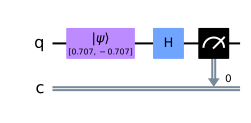

In [27]:
# 4

# X測定関数を作成します。
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# 量子ビットを初期化して測定します。
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

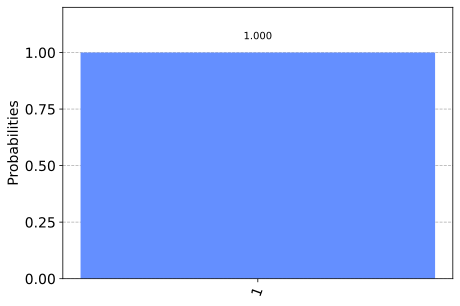

In [29]:
qobj = assemble(qc)  # 実行可能なQobjに回路をアセンブルします。
counts = sim.run(qobj).result().get_counts()  # シミュレーションを行い、状態ベクトルを返します。
plot_histogram(counts)

In [30]:
# 4 practice 1

$$
p(\ket{x}) = | \bra{x}\ket{\psi} |^2\\
により確率が計算できる。\\
p(\ket{+}) = | \bra{+}\ket{-} |^2\\
= | \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \cdot \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}  |^2\\
= | \frac{1}{2} (1 - 1) |^2\\
= 0\\
よって確率は0\\
$$

In [31]:
# 4 practice 2

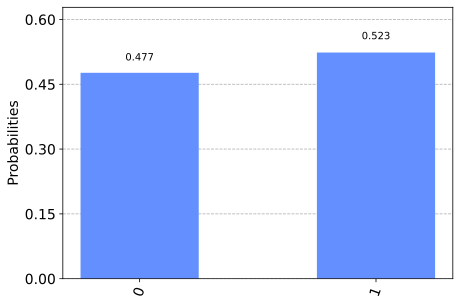

In [36]:
# まず、<+| から
initial_state = [1/sqrt(2), 1/sqrt(2)]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
qc.measure(0,0)
#qc.draw()

qobj = assemble(qc)  
counts = sim.run(qobj).result().get_counts()  
plot_histogram(counts)

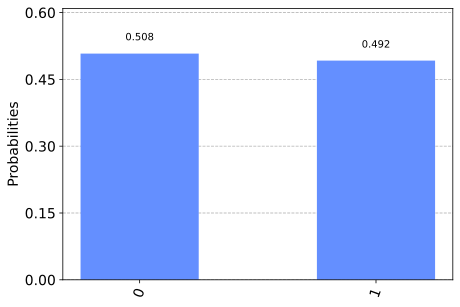

In [37]:
# 次に、<-| 
initial_state = [1/sqrt(2), -1/sqrt(2)]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
qc.measure(0,0)
#qc.draw()

qobj = assemble(qc)  
counts = sim.run(qobj).result().get_counts()  
plot_histogram(counts)

In [32]:
# 4 practice 3

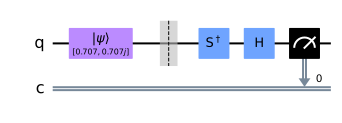

In [41]:
# Y測定関数を作成します。
# Z基底にH,Sゲート(Sダガーゲート)を作用させると、Y基底での測定と同義になる。
def y_measurement(qc,qubit,cbit):  #Y基底で測定する回路qcを作成する関数
    qc.sdg(qubit)  #Sダガーゲート（後ほど出てくる）
    qc.h(qubit)  #Hゲート
    qc.measure(qubit,cbit)  #測定
    return qc

# 以下、初期状態|↺>で測定した場合の実行例
# 初期状態を|↺>と定義する。
initial_state = [1/sqrt(2), complex(0,1/sqrt(2))]

qc = QuantumCircuit(1,1)  #1量子ビットと1古典ビットで回路の土台を用意
qc.initialize(initial_state, 0)
qc.barrier()
y_measurement(qc, 0, 0)
 
#回路の描写
qc.draw()

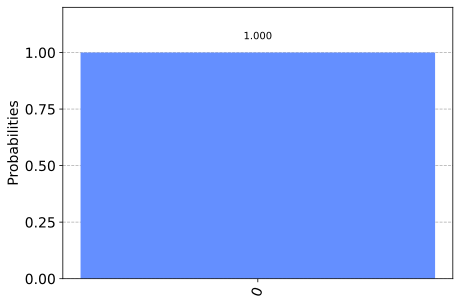

In [40]:
qobj = assemble(qc)  
counts = sim.run(qobj).result().get_counts()  
plot_histogram(counts)

In [43]:
# 5

In [44]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

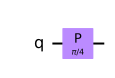

In [45]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

In [46]:
# 6 practice 1

$$
固有状態を求めるには、まず固有値を出したいので、\\
\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0 の式より\\
\text{det} (\mathbb{I} \ - \ \lambda \mathbb{I}) \ = \ 0 \\
\text{det} \begin{bmatrix} 1-\lambda & 0 \\ 0 & 1-\lambda \end{bmatrix} \ = \ 0 \\
detA = ad-bc より\\
(1 - \lambda)^2 = 0 \\
よって、固有値 \lambda = 1\\
次に固有ベクトルを求めるために、\\
A\ket{v} = \lambda\ket{v}を使うと\\
\mathbb{I}\ket{v} = \ket{v}\\
固有ベクトルvのマトリックスをa, bで表すと、\\
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} a \\ b \end{bmatrix}\\
結果として、\\
\begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} a \\ b \end{bmatrix}になる。\\
つまり固有ベクトルはなんでもよいということになる。\\
そのため、Iの固有状態は任意である\\
$$

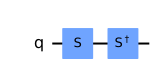

In [47]:
# 6-2

qc = QuantumCircuit(1)
qc.s(0)   # Sゲートを量子ビット0に適用します。
qc.sdg(0) # Sdgゲートを量子ビット0に適用します。
qc.draw()

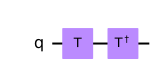

In [48]:
# 6-3

qc = QuantumCircuit(1)
qc.t(0)   # Tゲートを量子ビット0に適用します。
qc.tdg(0) # Tdgゲートを量子ビット0に適用します。
qc.draw()

In [49]:
# このセルのコードを実行してウィジェットを表示します。
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [50]:
import qiskit.tools.jupyter
%qiskit_version_table